In [50]:
pip install scikeras

In [51]:
pip install adversarial-robustness-toolbox

In [52]:
# -*- coding: utf-8 -*-
"""
Trains a convolutional neural network on the CIFAR-10 dataset, then generated adversarial images using the
DeepFool attack and retrains the network on the training set augmented with the adversarial images.
"""
from __future__ import absolute_import, division, print_function, unicode_literals

import logging

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import numpy as np
from matplotlib import pyplot as plt

from art.attacks.evasion import DeepFool
from art.estimators.classification import KerasClassifier
from art.utils import load_dataset
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

# Configure a logger to capture ART outputs; these are printed in console and the level of detail is set to INFO
logger = logging.getLogger()
logger.setLevel(logging.INFO)
handler = logging.StreamHandler()
formatter = logging.Formatter("[%(levelname)s] %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Read CIFAR10 dataset
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset(str("cifar10"))
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:500], y_test[:500]
im_shape = x_train[0].shape


# Create Keras convolutional neural network - basic architecture from Keras examples
# Source here: https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create classifier wrapper
classifier = KerasClassifier(model=model, clip_values=(min_, max_))
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=128)

# Craft adversarial samples with DeepFool
logger.info("Create DeepFool attack")
adv_crafter = DeepFool(classifier)
logger.info("Craft attack on training examples")
x_test_adv = adv_crafter.generate(x_test[:10])




[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
[INFO] Inferred 17 hidden layers on Keras classifier.
/usr/local/lib/python3.7/dis

Epoch 1/10
39/39 [==============================] - 22s 472ms/step - batch: 19.0000 - size: 128.0000 - loss: 2.1852 - accuracy: 0.1833
Epoch 2/10
39/39 [==============================] - 18s 470ms/step - batch: 19.0000 - size: 128.0000 - loss: 1.8668 - accuracy: 0.3077
Epoch 3/10
39/39 [==============================] - 18s 470ms/step - batch: 19.0000 - size: 128.0000 - loss: 1.6889 - accuracy: 0.3760
Epoch 4/10
39/39 [==============================] - 18s 467ms/step - batch: 19.0000 - size: 128.0000 - loss: 1.5623 - accuracy: 0.4291
Epoch 5/10
39/39 [==============================] - 18s 460ms/step - batch: 19.0000 - size: 128.0000 - loss: 1.5000 - accuracy: 0.4605
Epoch 6/10
39/39 [==============================] - 18s 465ms/step - batch: 19.0000 - size: 128.0000 - loss: 1.4143 - accuracy: 0.4882
Epoch 7/10
39/39 [==============================] - 18s 464ms/step - batch: 19.0000 - size: 128.0000 - loss: 1.3316 - accuracy: 0.5248
Epoch 8/10
39/39 [==============================] - 18s

[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Create DeepFool attack
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Craft attack on training examples
[INFO] Cr

[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%
[INFO] Success rate of DeepFool attack: 100.00%


[*] Real class: cat
[*] Predicted class: cat with: 0.3080580532550812


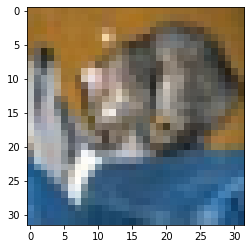

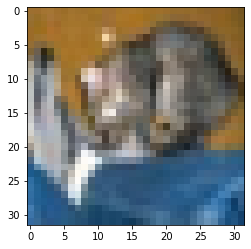

[*] Predicted adversarial class: bird with: 0.28196609020233154
--------------------------------------
[*] Real class: ship
[*] Predicted class: ship with: 0.4886837303638458


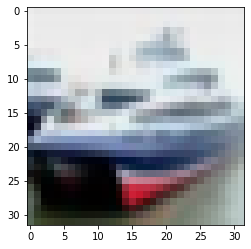

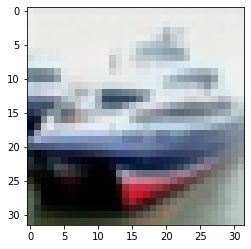

[*] Predicted adversarial class: automobile with: 0.47054144740104675
--------------------------------------
[*] Real class: ship
[*] Predicted class: ship with: 0.7440406084060669


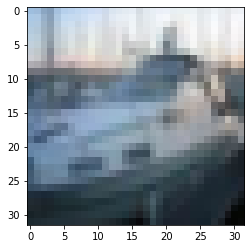

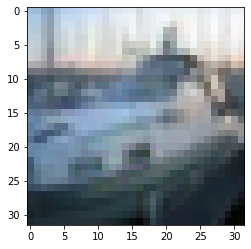

[*] Predicted adversarial class: automobile with: 0.38886842131614685
--------------------------------------
[*] Real class: airplane
[*] Predicted class: ship with: 0.916895866394043


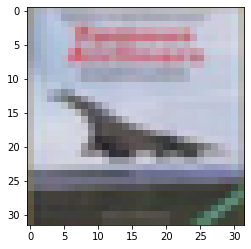

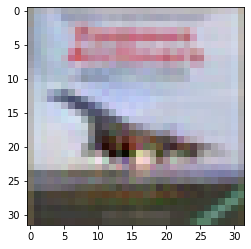

[*] Predicted adversarial class: airplane with: 0.8700872659683228
--------------------------------------
[*] Real class: frog
[*] Predicted class: deer with: 0.45927664637565613


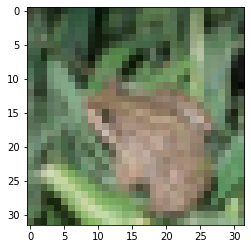

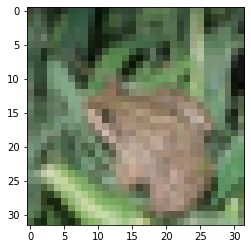

[*] Predicted adversarial class: frog with: 0.3602422773838043
--------------------------------------
[*] Real class: frog
[*] Predicted class: frog with: 0.864205002784729


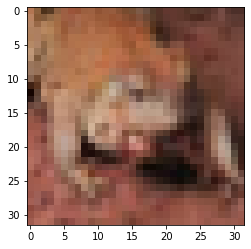

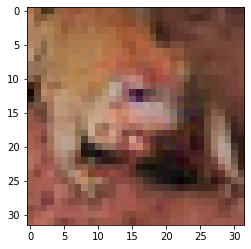

[*] Predicted adversarial class: bird with: 0.48727938532829285
--------------------------------------
[*] Real class: automobile
[*] Predicted class: airplane with: 0.4220515191555023


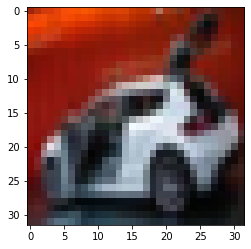

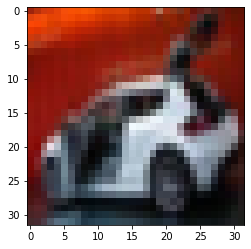

[*] Predicted adversarial class: cat with: 0.3555814325809479
--------------------------------------
[*] Real class: frog
[*] Predicted class: deer with: 0.6013151407241821


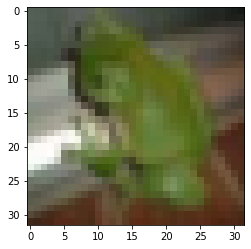

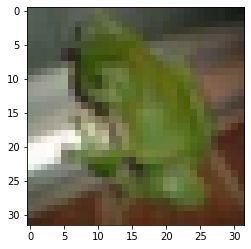

[*] Predicted adversarial class: frog with: 0.4012569189071655
--------------------------------------
[*] Real class: cat
[*] Predicted class: deer with: 0.30644795298576355


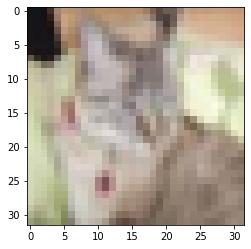

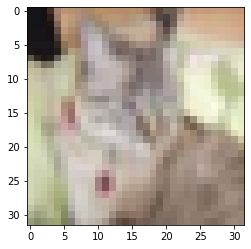

[*] Predicted adversarial class: cat with: 0.2704763412475586
--------------------------------------
[*] Real class: automobile
[*] Predicted class: automobile with: 0.9455555081367493


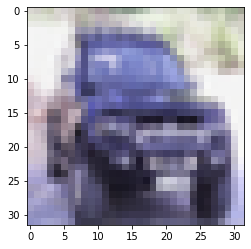

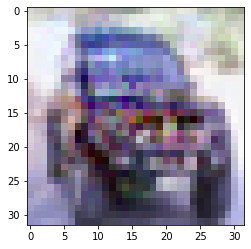

[*] Predicted adversarial class: truck with: 0.7634260058403015
--------------------------------------


In [57]:
y_test = y_test[:10]
for i in range(len(x_test[:10])):
  print("[*] Real class: {}".format(classes[np.where(y_test[i] == 1)[0][0]]))
  res = classifier.predict(x_test[i].reshape(1,32,32,3))
  print("[*] Predicted class: {} with: {}".format(classes[np.where(res == np.max(res))[1][0]], np.max(res)))
  fig = plt.figure
  plt.imshow(x_test[i], cmap='gray')
  plt.show()
  plt.imshow(x_test_adv[i], cmap='gray')
  plt.show()
  res = classifier.predict(x_test_adv[i].reshape(1,32,32,3))
  print("[*] Predicted adversarial class: {} with: {}".format(classes[np.where(res == np.max(res))[1][0]], np.max(res)))
  print("--------------------------------------")
  
